<h2 align = "center">Hands On 1: Polynomial Regression</h2>

Rasta Tadayon - 810196436

---

In this hands on we will be predecting a feature in a dataset from [affinity solution](https://www.affinity.solutions/) based on all the other features. This dataset consists of data related to different types of spendings. We will be using polynomial regression to predict the spend_tws column against other columns.

In [ ]:
import sys
import sklearn
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


np.random.seed(1)

## Load Data

In [ ]:
data = pd.read_csv('data/Affinity-City-Daily-final.csv')
data.head()

,year,month,day,cityid,spend_acf,spend_aer,spend_all,spend_grf,spend_hcs,spend_tws
0,2020,1,13,1,-0.00322,0.00706,-0.002190,0.00389,-0.03550,-0.00510
1,2020,1,13,2,0.00660,-0.07790,-0.001070,-0.00956,0.06040,-0.03250
2,2020,1,13,3,-0.10400,0.03340,-0.000774,0.01240,-0.00547,0.01810
3,2020,1,13,4,-0.03560,-0.15000,-0.009820,0.00405,0.03050,-0.01790
4,2020,1,13,5,-0.00770,-0.04040,-0.011100,0.00888,-0.00653,0.00175


The dataset contains information about money spend or earned in different areas of businesses. Each column is briefly explained bellow:
- spend_all: Seasonally adjusted credit/debit card spending in all merchant category codes (MCC)

- spend_acf: Seasonally adjusted credit/debit card spending in accomodation and food service (ACF)

- spend_aer: Seasonally adjusted credit/debit card spending in arts, entertainment, and recreation (AER)

- spend_apg: Seasonally adjusted credit/debit card spending in general merchandise stores (GEN)

- spend_grf: Seasonally adjusted credit/debit card spending in grocery and food store (GRF)

- spend_hcs: Seasonally adjusted credit/debit card spending in health care and social assistance (HCS)

- spend_tws: Seasonally adjusted credit/debit card spending in transportation and warehousing (TWS)

In [ ]:
data = data.drop(columns=['spend_all'])

In [ ]:
data.head()

,year,month,day,cityid,spend_acf,spend_aer,spend_grf,spend_hcs,spend_tws
0,2020,1,13,1,-0.00322,0.00706,0.00389,-0.03550,-0.00510
1,2020,1,13,2,0.00660,-0.07790,-0.00956,0.06040,-0.03250
2,2020,1,13,3,-0.10400,0.03340,0.01240,-0.00547,0.01810
3,2020,1,13,4,-0.03560,-0.15000,0.00405,0.03050,-0.01790
4,2020,1,13,5,-0.00770,-0.04040,0.00888,-0.00653,0.00175


We want to predict the spend_tws feature against all the other features in the dataset. The spend_tws represents spendings in transport and warehousing.

In [ ]:
X = data[data.columns[4:]].drop(columns=['spend_tws'])
y = data['spend_tws']

## Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((9800, 4), (2450, 4))

In [ ]:
y_train.shape, y_test.shape

((9800,), (2450,))

In [ ]:
X_train.shape[0]/X_test.shape[0]

4.0

The dataset is split into train and test set. 80 percent of the data is chosen for the train set and the remaining 20 percent is used for the test set

## Training Regression Models

We are going to use a pipeline which is used to sequentially apply a list of transforms and a final estimator.
Here we first apply a normalization transform to the data, then polynomial transform is applied to the data and lastly linear regression with least square error is used to find the weight values. 

In [ ]:
p_reg = Pipeline([
        ("std_scaler", StandardScaler()),
        ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

In [ ]:
p_reg.fit(X_train, y_train)
y_train_pred = p_reg.predict(X_train)
y_test_pred = p_reg.predict(X_test)

print("train mean square error: ", mean_squared_error(y_train, y_train_pred))
print("test mean square error: ", mean_squared_error(y_test, y_test_pred))

train mean square error:  0.007947091635326435
test mean square error:  0.007951343803233027


In [ ]:
def visualize(actual_value, pred_value):
    x = np.arange(0, len(actual_value))
    plt.plot(x, pred_value, color = 'red', label='$Predicted Values$')
    plt.plot(x, actual_value, color= 'green', label='$Actual Values$')
    plt.title('Measured and estimated values')
    plt.xlabel('Data Point')
    plt.ylabel('Value')
    plt.legend(loc='lower left')
    plt.show()

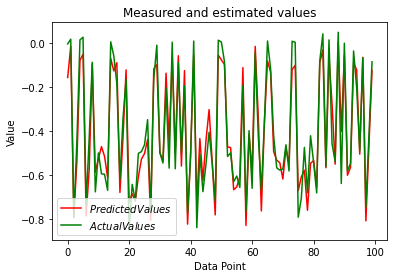

In [ ]:
visualize(y_train[:100], y_train_pred[:100])

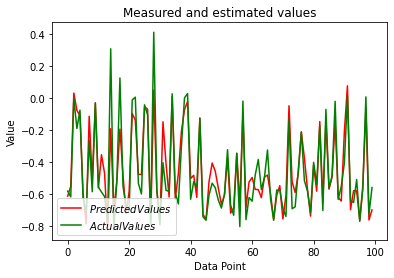

In [ ]:
visualize(y_test[:100], y_test_pred[:100])

## Best Polynomial Degree

In [ ]:
def find_best_degree(X_train, X_test, y_train, y_test):
    train_mse = []
    test_mse = []
    for i in range (1, 6):
        p_reg= Pipeline([
            ("std_scaler", StandardScaler()),
            ("poly_features", PolynomialFeatures(degree=i, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])
        p_reg.fit(X_train, y_train)
        y_train_pred = p_reg.predict(X_train)
        y_test_pred = p_reg.predict(X_test)
        train_mse.append(mean_squared_error(y_train, y_train_pred))
        test_mse.append(mean_squared_error(y_test, y_test_pred))
    return train_mse, test_mse

In [ ]:
def visualize_degrees(train_mse, test_mse):
    degrees = np.arange(1, len(train_mse)+1)
    plt.plot(degrees, train_mse, color = 'orange', label='$Train Loss$')
    plt.plot(degrees, test_mse, color= 'cornflowerblue', label='$Test Loss$')
    plt.title('Mean Square Error for Train and Test Data')
    plt.xlabel('degree')
    plt.ylabel('mean square error')
    plt.legend(loc='lower left')
    plt.show()

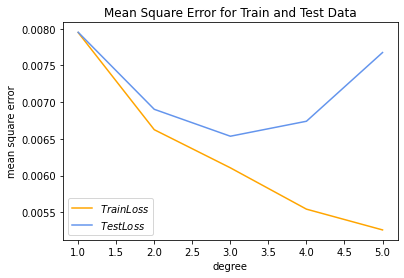

In [ ]:
train_mse, test_mse = find_best_degree(X_train, X_test, y_train, y_test)
visualize_degrees(train_mse, test_mse)

As is observable above the best degree for the polynomial that can fit our data is 3 since overfitting starts to heppen at the 4 and 5 degrees as the test error increases while train error is decreasing which means the model is starting to fit to the training data too closely and is loosing the ability of generalization.

## Using the Best Model

Now we will use the 3rd order polynomial to predict the spend_tws data. 

In [ ]:
p_reg= Pipeline([
            ("std_scaler", StandardScaler()),
            ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])
p_reg.fit(X_train, y_train)
y_train_pred = p_reg.predict(X_train)
y_test_pred = p_reg.predict(X_test)
print("train mean square error: ", mean_squared_error(y_train, y_train_pred))
print("test mean square error: ", mean_squared_error(y_test, y_test_pred))

train mean square error:  0.006105266574837464
test mean square error:  0.006535401547411913


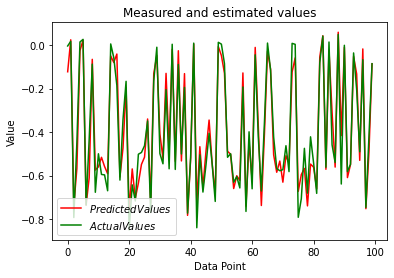

In [ ]:
visualize(y_train[:100], y_train_pred[:100])

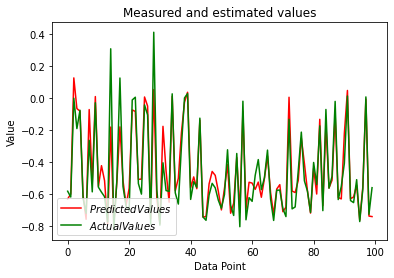

In [ ]:
visualize(y_test[:100], y_test_pred[:100])